In [6]:
import pandas as pd

# Load the dataset
file_path ="E:\\retail_sales_dataset.csv" # Update this if needed
df = pd.read_csv(file_path)

# Display basic information
print(df.info())  # Shows column names, data types, and non-null values
print(df.head())  # Shows the first few rows of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21    

In [8]:
# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [11]:
# Drop columns with more than 30% missing values
threshold = 0.3 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Fill missing numerical values with the median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify missing values are handled
print(df.isnull().sum())



Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


C:\Users\fargh\AppData\Local\Temp\ipykernel_19684\4265910208.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\fargh\AppData\Local\Temp\ipykernel_19684\4265910208.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [13]:
# Remove duplicate rows
df = df.drop_duplicates()
print(f"Remaining rows after duplicate removal: {len(df)}")


Remaining rows after duplicate removal: 1000


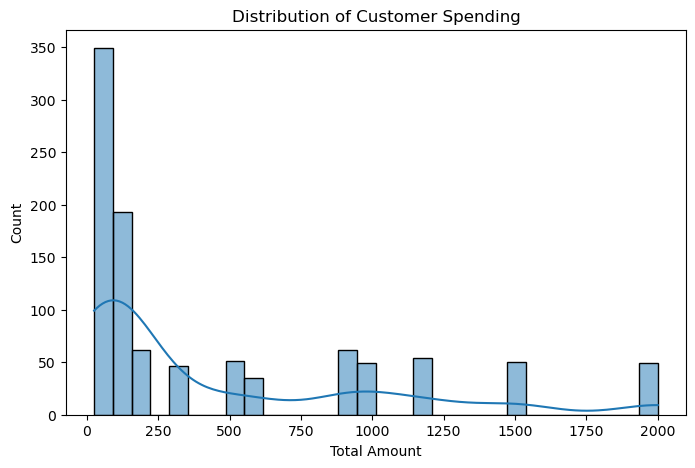

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of total spending
plt.figure(figsize=(8, 5))
sns.histplot(df['Total Amount'], bins=30, kde=True)
plt.title("Distribution of Customer Spending")
plt.show()


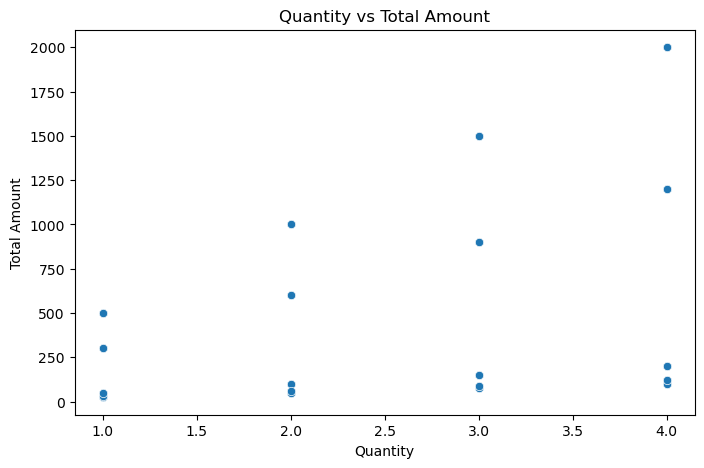

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Quantity"], y=df["Total Amount"])
plt.title("Quantity vs Total Amount")
plt.xlabel("Quantity")
plt.ylabel("Total Amount")
plt.show()


In [28]:
# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Calculate Purchase Frequency for each Customer
purchase_frequency = df.groupby("Customer ID")["Transaction ID"].count().reset_index()
purchase_frequency.rename(columns={"Transaction ID": "Purchase_Frequency"}, inplace=True)

# Calculate Total Spend for each Customer
total_spend = df.groupby("Customer ID")["Total Amount"].sum().reset_index()

# Merge the two dataframes
customer_data = pd.merge(total_spend, purchase_frequency, on="Customer ID")

# Create new feature: Average Purchase Value
customer_data["Avg_Purchase_Value"] = customer_data["Total Amount"] / customer_data["Purchase_Frequency"]

# Create new feature: Recency (days since last purchase)
last_purchase_date = df.groupby("Customer ID")["Date"].max().reset_index()
last_purchase_date.rename(columns={"Date": "Last_Purchase_Date"}, inplace=True)

# Merge with customer data
customer_data = pd.merge(customer_data, last_purchase_date, on="Customer ID")

# Calculate Recency
customer_data["Recency"] = (customer_data["Last_Purchase_Date"].max() - customer_data["Last_Purchase_Date"]).dt.days

# Display updated customer dataset
print(customer_data[["Total Amount", "Purchase_Frequency", "Avg_Purchase_Value", "Recency"]].head())


   Total Amount  Purchase_Frequency  Avg_Purchase_Value  Recency
0           150                   1               150.0       38
1          1000                   1              1000.0      308
2            30                   1                30.0      353
3           500                   1               500.0      225
4           100                   1               100.0      240


In [32]:
# Create new feature: Average Purchase Value
customer_data["Avg_Purchase_Value"] = customer_data["Total Amount"] / customer_data["Purchase_Frequency"]

# Convert 'Last_Purchase_Date' to datetime format
customer_data["Last_Purchase_Date"] = pd.to_datetime(customer_data["Last_Purchase_Date"])

# Create new feature: Recency (days since last purchase)
customer_data["Recency"] = (customer_data["Last_Purchase_Date"].max() - customer_data["Last_Purchase_Date"]).dt.days

# Display the required columns
print(customer_data[["Total Amount", "Purchase_Frequency", "Avg_Purchase_Value", "Recency"]].head())


   Total Amount  Purchase_Frequency  Avg_Purchase_Value  Recency
0           150                   1               150.0       38
1          1000                   1              1000.0      308
2            30                   1                30.0      353
3           500                   1               500.0      225
4           100                   1               100.0      240


In [38]:
# Ensure 'Date' column is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Calculate Purchase Frequency (number of transactions per Customer ID)
purchase_frequency = df.groupby("Customer ID")["Transaction ID"].count().reset_index()
purchase_frequency.rename(columns={"Transaction ID": "Purchase_Frequency"}, inplace=True)

# Calculate Total Spend for each Customer
total_spend = df.groupby("Customer ID")["Total Amount"].sum().reset_index()

# Get last purchase date
last_purchase_date = df.groupby("Customer ID")["Date"].max().reset_index()
last_purchase_date.rename(columns={"Date": "Last_Purchase_Date"}, inplace=True)

# Merge all data
df_cluster = total_spend.merge(purchase_frequency, on="Customer ID").merge(last_purchase_date, on="Customer ID")

# Calculate Recency
df_cluster["Recency"] = (df_cluster["Last_Purchase_Date"].max() - df_cluster["Last_Purchase_Date"]).dt.days

# Select features for clustering
features = ["Total Amount", "Purchase_Frequency", "Recency"]
df_cluster = df_cluster[features]

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Display the first few rows
print(df_cluster.head())


   Total Amount  Purchase_Frequency  Recency
0           150                   1       38
1          1000                   1      308
2            30                   1      353
3           500                   1      225
4           100                   1      240


In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Calculate Purchase Frequency (number of transactions per customer)
purchase_frequency = df.groupby("Customer ID")["Transaction ID"].count().reset_index()
purchase_frequency.rename(columns={"Transaction ID": "Purchase_Frequency"}, inplace=True)

# Calculate Total Spend for each customer
total_spend = df.groupby("Customer ID")["Total Amount"].sum().reset_index()

# Get Last Purchase Date for each customer
last_purchase_date = df.groupby("Customer ID")["Date"].max().reset_index()
last_purchase_date.rename(columns={"Date": "Last_Purchase_Date"}, inplace=True)

# Merge all data
df_cluster = total_spend.merge(purchase_frequency, on="Customer ID").merge(last_purchase_date, on="Customer ID")

# Calculate Recency (days since last purchase)
df_cluster["Recency"] = (df["Date"].max() - df_cluster["Last_Purchase_Date"]).dt.days

# Select features for clustering
features = ["Total Amount", "Purchase_Frequency", "Recency"]
df_cluster = df_cluster[features]

# Standardize the data
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Display the first few rows
print(df_cluster.head())


   Total Amount  Purchase_Frequency  Recency
0           150                   1       38
1          1000                   1      308
2            30                   1      353
3           500                   1      225
4           100                   1      240


In [50]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering (updated column names)
features = ["Total Amount", "Purchase_Frequency", "Recency"]
df_cluster = df_cluster[features]  # Use df_cluster, which contains the required features

# Standardize the data
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)


In [52]:
# Convert the scaled data back to a DataFrame for readability
df_cluster_scaled_df = pd.DataFrame(df_cluster_scaled, columns=features)

# Print the first few rows
print(df_cluster_scaled_df.head())


   Total Amount  Purchase_Frequency   Recency
0     -0.546704                 0.0 -1.368336
1      0.971919                 0.0  1.197615
2     -0.761098                 0.0  1.625274
3      0.078611                 0.0  0.408823
4     -0.636035                 0.0  0.551375


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

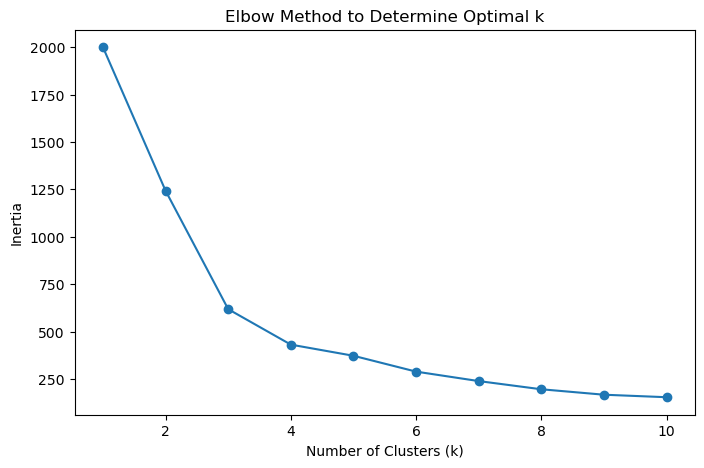

In [54]:
from sklearn.cluster import KMeans
import numpy as np

# Try different values of k
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal k")
plt.show()


In [56]:
# Choose optimal k from elbow method (let’s say k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_cluster_scaled)

# Show cluster counts
print(df["Cluster"].value_counts())


Cluster
1    393
0    381
2    226
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


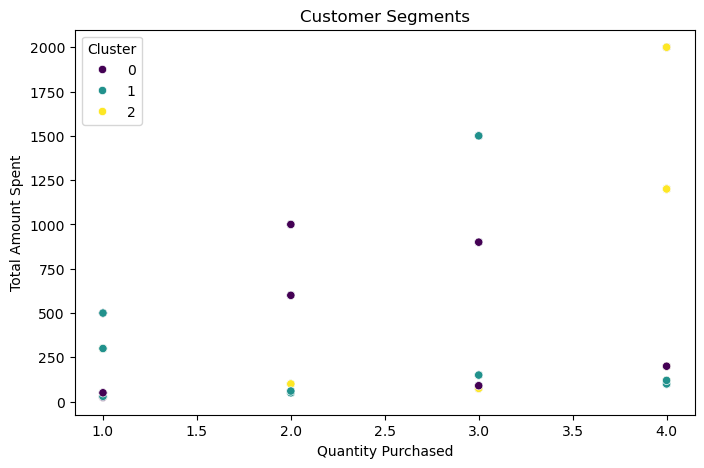

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Quantity"], y=df["Total Amount"], hue=df["Cluster"], palette="viridis")
plt.title("Customer Segments")
plt.xlabel("Quantity Purchased")
plt.ylabel("Total Amount Spent")
plt.show()
